This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#import tensorflow as tf
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
#define out model
model = keras.Sequential([ #sequential layer design
    layers.Dense(512, activation="relu"), #dimension of first layer=512
    layers.Dense(10, activation="softmax") #dimension of second layer=10
])

10개의 확률 점수가 들어있는 배열(모두 더하면 1)을 반환하는 소프트맥스
각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

* 손실 함수: 훈련 데이터에서 신경망의 성능을 층정하는 방법으로 네트워크가 옳은 방향으로 학습할수 있도록 도와줌
* 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘
* 훈련과 테스트 과정을 모니터링할 지표: 여기서는 정확도만 고려

**Preparing the image data**

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) 

In [ ]:
train_images[0].shape #changes

(784,)

In [ ]:
train_images.shape #new dimension 

(60000, 784)

In [ ]:
train_images[0] # value ranges 0 to 255-> normalizes to 0 to 1 -> devide by 255

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

0 과 1 사이의 값을 가지는 float 32 타입의 (60000, 28 * 28) 크기인 배열로 바꿔줌

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) #모델 학습

Epoch 1/5
469/469 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0682 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9887


In [ ]:
model.summary() #parameter related to first layer 401920 , w1 metrix 784 *512 + 512 =401920
#dimension for w2 metrix 10*512+10 =5130

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [ ]:
test_images.shape  #10000 images

(10000, 784)

In [ ]:
test_digits = test_images[0:10] #first 10 images
predictions = model.predict(test_digits)
predictions[0] # check first prediction

array([9.8324116e-10, 4.3332662e-10, 1.5462106e-06, 1.5279882e-04,
       3.1464568e-12, 7.1035650e-08, 1.5731870e-14, 9.9984455e-01,
       3.3430741e-08, 8.7960973e-07], dtype=float32)

In [ ]:
predictions[0].argmax() #9.9788541e-01 -> predictio is 7

7

In [ ]:
predictions[0][7]

0.99984455

In [ ]:
test_labels[0] #we got right prediction

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}") #test_acc: 91.5% 테스트 세트 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9795
test_acc: 0.9794999957084656


## Data representations for neural networks

텐서는 임의의 차원 개수를가지는 행렬의 일반화된 모습 (차원=축)

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim #넘파이 배열의 축 개수(랭크)

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7]) # 5개의 원소 = 5차원 벡터
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim # 하나의 축

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim # 축 두개 행과 열

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

* 축의 개수(랭크): 행렬에는 2개의 축
* 크기: 3D 테넛 크기 (3, 3, 5)
* 데이터 타입: float32 uint8 float64

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim # 축 개수

3

In [ ]:
train_images.shape # 60000 number of items,second dimension 28 values, third dim 28 values 

(60000, 28, 28)

In [ ]:
train_images.dtype # 데이터 타입

dtype('uint8')

**Displaying the fourth digit**

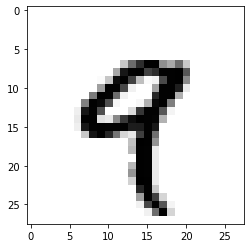

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4] # 다섯번째 샘플
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:] #sub sample

In [ ]:
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

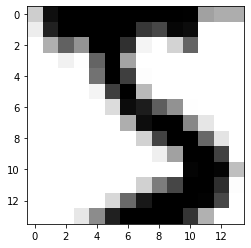

In [ ]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations 원소별 연산

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2 # x는 2D 넘파이 배열
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]): #first dim
        for j in range(x.shape[1]): #second dim
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
import numpy as np

In [ ]:
x1 = np.array([[1,-2,3],[2,3,-1]]) 
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [ ]:
x1.ndim

2

In [ ]:
len(x1.shape)

2

In [ ]:
x1.shape

(2, 3)

In [ ]:
naive_relu(x1) # if the value is less than 0, 0 will be returned

array([[1, 0, 3],
       [2, 3, 0]])

In [ ]:
# x=y sharing memory slot

In [ ]:
def naive_add(x, y): #원소별 덧샘
    assert len(x.shape) == 2 # x,y 2D 넘파이 배열
    assert x.shape == y.shape
    x = x.copy() ## make the copy of array/ important!!! -> if not, original data is changed 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000): #complied edition is faster
    z = x + y
    z = np.maximum(z, 0.) 
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.19 s


### Broadcasting

1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

y에 비어있는 첫번째 축을 추가하여 크기를 (1,10)으로 만든후 y를 이 축에 32번 반복하면 y의 크기 (32,10)

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y.shape

(1, 10)

In [ ]:
X.shape

(32, 10)

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x는 2D 넘파이 배열
    assert len(y.shape) == 1 # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
X+y

array([[0.60918925, 1.45305082, 0.95177763, 1.82726346, 1.65052899,
        1.23217952, 1.38803253, 1.43108576, 1.44328408, 0.77765951],
       [1.48521291, 1.47069689, 1.26390564, 1.59521048, 1.66030448,
        0.63264446, 1.24718489, 1.67965448, 1.1832215 , 0.82869727],
       [1.15065541, 1.39499482, 1.42492271, 1.68685777, 0.89906335,
        0.69620492, 1.31134309, 1.33783195, 0.85637991, 0.91052447],
       [1.30658736, 1.05232482, 1.14422942, 1.79545893, 1.56424266,
        0.41488063, 0.66384629, 1.69890924, 1.44727673, 1.28741429],
       [0.66339276, 0.78350344, 0.94040613, 1.73497949, 1.42447274,
        0.54251347, 1.00319274, 1.12906832, 0.93739644, 1.31235492],
       [1.14547207, 1.03487169, 0.6710876 , 1.27782186, 1.16422776,
        0.83284003, 0.66195343, 1.09953659, 1.20366131, 1.35060936],
       [1.06464269, 1.67535602, 1.45713298, 1.0850945 , 1.44484845,
        0.49216976, 1.39227993, 1.44553945, 1.12896035, 0.75575397],
       [0.96669476, 1.63183479, 1.2987775

크기가 다른 투 텐서에 브로드캐스팅을 원소별 maximum 연산을 적용하는 예

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) # (64, 3, 32, 10) 크기의 랜덤 텐서
y = np.random.random((32, 10)) 
z = np.maximum(x, y) # 출력 z는 x와 동일하게 (64, 3, 32, 10)

In [ ]:
# ppt에 있는 broadcasting 사용

### Tensor product 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1 #x,y는 넘파이 벡터
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # 넘파이 행렬
    assert len(y.shape) == 1 # 넘파이 벡터
    assert x.shape[1] == y.shape[0] # x의 두번째 차원이 y의 첫번쨰 차원과 같아야함
    z = np.zeros(x.shape[0]) # x의 행과 같은 크기의 0이 채워진 벡터를 만듦
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0] # x의 두번째 차원이 y의 첫번째 차원과 같아야함
    z = np.zeros((x.shape[0], y.shape[1])) # x의 행과 같은 크기의 0이 채워진 벡터를 만듦
    for i in range(x.shape[0]): # x의 행 반복
        for j in range(y.shape[1]): # y의 열 반복
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images.shape #reshaped

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1)) 
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x) #전치
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop", #"SGD"
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary